In [1]:
!date

Thu Nov 29 15:30:32 UTC 2018


![KSchool](https://kschool.com/wp-content/uploads/2016/08/logo-kschool.png)

# Hi everyone!

I'm Daniel Mateos. I teach at the [masters in Data Science] here at KSchool.

I also teach at the [CUNEF masters program in Data Science] and in the bioinformatics track at [CEU San Pablo]. 

I am a Molecular Biologist and self-taught Data Scientist. You can read all about me at [my website].

[masters in Data Science]: https://kschool.com/cursos/master-en-data-science-madrid/
[CUNEF masters program in Data Science]: https://www.cunef.edu/web/ade-and-master-data-science-finance-marketing-resources
[CEU San Pablo]: https://www.uspceu.com/oferta-academica/grado/grado-en-ingenieria-biomedica
[my website]: http://mateos.io/

## Today

What we are going to do is dive head first into Deep Learning. This talk doesn't assume any knowledge, just the eagerness to jump right into building image classification models!

We will develop a [tool that can tell hotdogs from stuff that is not hotdogs]. That might make us [really rich]!

[tool that can tell hotdogs from stuff that is not hotdogs]: https://www.youtube.com/watch?v=pqTntG1RXSY
[really rich]: https://www.youtube.com/watch?v=NN1ctbKoXTc

## Where we are

[Google Colab] is a hosted notebook environment by Google. You can run GPU-accelerated experiments here for free!

Make sure you have a GPU accelerated runtime by clicking on runtime / change runtime type and choosing a "GPU" hardware accelerator.

[Google Colab]: bhttps://research.google.com/colaboratory/faq.html

# Getting some hotdogs

I've already done the hard, exhausting field work for you. If you are curious about how I did, check it out [in my blog].

Run the following cell. It will download a zip file in the current folder.

[in my blog]: http://mateos.io/blog/

In [1]:
!wget "https://www.dropbox.com/s/dhpekpce05iev6a/data_v2.zip?dl=0" -O data.zip

--2019-02-26 12:25:31--  https://www.dropbox.com/s/dhpekpce05iev6a/data_v2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.1, 2620:100:6024:1::a27d:4401
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dhpekpce05iev6a/data_v2.zip [following]
--2019-02-26 12:25:32--  https://www.dropbox.com/s/raw/dhpekpce05iev6a/data_v2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaaab87965e7ef9e3779b987b3f.dl.dropboxusercontent.com/cd/0/inline/AcHyiZuLgS_a0JMhdAjm9nbpICEsLFiXRsgQU7ln1MFwNRO4sC0c61YOo7jgAJym3JcKTtuNXV9_BLxa5RTTwbKnUw_vNACsgGalv1tG-bptlGZVdTDQVqeRa1l29kjYskI/file# [following]
--2019-02-26 12:25:32--  https://ucaaab87965e7ef9e3779b987b3f.dl.dropboxusercontent.com/cd/0/inline/AcHyiZuLgS_a0JMhdAjm9nbpICEsLFiXRsgQU7ln1MFwNRO4sC0c61YOo7jgAJym3JcKTtuNXV9_BLxa5RTTwbKnUw_vNACsgGalv1tG-bptl

In [2]:
!ls -lh

total 3,0G
-rw-rw-r-- 1 dani dani     19K nov 29 11:24 01-Getting_Some_Hotdogs.ipynb
-rw-rw-r-- 1 dani dani     12K sep  3 09:56 02-Train_test_split.ipynb
-rw-rw-r-- 1 dani dani     18K feb 26 12:31 03a-A_First_Approximation.ipynb
-rw-rw-r-- 1 dani dani    111K nov 28 19:28 03-A_First_Approximation.ipynb
-rw-rw-r-- 1 dani dani    207K nov 22 11:37 04-Improving_our_thingy.ipynb
-rw-rw-r-- 1 dani dani    187K nov 29 12:05 05-On_the_shoulders_of_giants.ipynb
-rw-rw-r-- 1 dani dani    296K nov 22 11:40 06-Improving_the_detector.ipynb
drwxrwxr-x 5 dani dani    4,0K jun 27  2018 data
-rw-rw-r-- 1 dani dani    214M jun 25  2018 data_v1.zip
-rw-r--r-- 1 dani dani    711M jun 27  2018 data_v2.zip
-rw-rw-r-- 1 dani dani    1,1G nov 30 21:18 data_v3.zip
-rw-rw-r-- 1 dani dani    711M feb 26 12:30 data.zip
-rw-rw-r-- 1 dani dani    4,2K nov 22 11:15 environment.yml
-rwxrwx--- 1 dani plugdev 265K feb 26 12:31 hotdognohotdog_datakonf_template.ipynb
-rw-rw-r-- 1 dani dani     29K jul 18  2018 hotdog_

Now, unzip the zip file. It contains a 'data' folder that contains three folders in turn: train, test and validation. Inside each of those there are two folders: "hotdog" and "nohotdog".

In [3]:
!rm -rf data/
!unzip -oq data.zip
!ls -lh data

total 12K
drwxrwxr-x 4 dani dani 4,0K jun 27  2018 test
drwxrwxr-x 4 dani dani 4,0K jun 27  2018 train
drwxrwxr-x 4 dani dani 4,0K jun 27  2018 validation


# The Classifier

![Keras](https://cdn-images-1.medium.com/max/1600/1*wwnExqe720PPHykHhs5Hqw.png)

Let's build our first Convolutional Neural Network! We will be using [Keras].

[Keras]: https://keras.io

In [5]:
import keras
from keras import backend as K

Using TensorFlow backend.


In [6]:
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense

my_first_cnn = keras.Sequential()
my_first_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
my_first_cnn.add(MaxPooling2D((2,2)))
my_first_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_first_cnn.add(MaxPooling2D((2,2)))
my_first_cnn.add(Flatten())
my_first_cnn.add(Dense(64, activation='relu'))
my_first_cnn.add(Dense(1, activation='sigmoid'))

my_first_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total para

## Feeding it

We will need to feed the classifier in batches so it can learn. We will use Keras's [ImageDataGenerator].

[ImageDataGenerator]: https://keras.io/preprocessing/image/

In [7]:
%%time
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'data/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255)
test_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(120,120),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        class_mode='binary')


Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.
CPU times: user 235 ms, sys: 48 ms, total: 283 ms
Wall time: 412 ms


## Waste no time in learning

At this point, we are ready to do some learning! Let's just go ahead.


In [8]:
%%time
from keras.optimizers import Adam

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history_pt1 = my_first_cnn.fit_generator(train_generator,
                                         steps_per_epoch=20,
                                         epochs=10,
                                         validation_data=validation_generator,
                                         validation_steps=10)

my_first_cnn.save('my_first_cnn_1.h5')

Epoch 1/10
20/20 [==============================] - 16s 824ms/step - loss: 0.4836 - acc: 0.8595 - val_loss: 0.3903 - val_acc: 0.8694
Epoch 2/10
20/20 [==============================] - 14s 682ms/step - loss: 0.3554 - acc: 0.8740 - val_loss: 0.3347 - val_acc: 0.8704
Epoch 3/10
20/20 [==============================] - 14s 682ms/step - loss: 0.2869 - acc: 0.8781 - val_loss: 0.2664 - val_acc: 0.8775
Epoch 4/10
20/20 [==============================] - 13s 673ms/step - loss: 0.2644 - acc: 0.8765 - val_loss: 0.2716 - val_acc: 0.8725
Epoch 5/10
20/20 [==============================] - 13s 659ms/step - loss: 0.2617 - acc: 0.8683 - val_loss: 0.2552 - val_acc: 0.8684
Epoch 6/10
20/20 [==============================] - 13s 662ms/step - loss: 0.2446 - acc: 0.8860 - val_loss: 0.2563 - val_acc: 0.8785
Epoch 7/10
20/20 [==============================] - 14s 722ms/step - loss: 0.2377 - acc: 0.8930 - val_loss: 0.2313 - val_acc: 0.9089
Epoch 8/10
20/20 [==============================] - 13s 660ms/step - 

## What is actually happening here?

Our classifier is a [convolutional neural network]. These have revolutionized a number of applications, mostly since their huge success in the 2012 ImageNet competition.

[convolutional neural network]: https://en.wikipedia.org/wiki/Convolutional_neural_network

![2012 ImageNet competition](https://blogs.nvidia.com/wp-content/uploads/2016/06/DefenseAIPicture3-002.png)

## Convolutional Neural Networks

They are based on convolution. Basically, we apply filters to subsections of the image and calculate how much each subsection fits with the feature described by the filter.

![Convolution](https://cdn-images-1.medium.com/max/1600/1*_34EtrgYk6cQxlJ2br51HQ.gif)

We do that several time, aggregating aggregations, learning more and more sofisticated features.

![Convolutional Neural Networks](https://www.jeremyjordan.me/content/images/2018/04/vgg16.png)

# Measuring the right things

Keras has assigned the label 0 to our hotdog class, which we consider positive, and 1 to our nothotdog class, which we consider negative. Therefore, in our binary classification setting we will have true positives top left, true negatives bottom right, false positives bottom left, and false negatives top right.

$$ precision = \frac{true\ positives}{predicted\ positives} = \frac{C_{0,0}}{C_{0,0} + C_{1,0}} $$

and recall will be:

$$ recall = \frac{true\ positives}{total\ positives} = \frac{C_{0,0}}{C_{0,0} + C_{0,1}}$$


Found 888 images belonging to 2 classes.
0.6979166666666666 0.5877192982456141


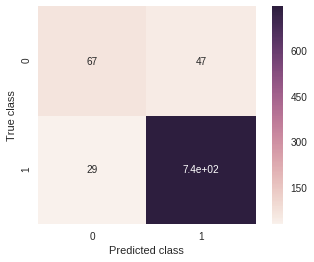

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline


validation_generator_noshuffle = test_datagen.flow_from_directory(validation_dir,
                                                                  target_size=(120,120),
                                                                  batch_size=100,
                                                                  shuffle=False,
                                                                  class_mode='binary')

predictions = my_first_cnn.predict_generator(validation_generator_noshuffle, steps=9)
C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

## Unbalanced

We have many more nothodogs than not hodogs. That will affect how good we consider our classifier.

In [10]:
%%time
from keras.optimizers import Adam


my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history_pt2 = my_first_cnn.fit_generator(train_generator,
                                         class_weight = {0: 7, 1: 1},
                                         steps_per_epoch=20,
                                         epochs=10,
                                         validation_data=validation_generator,
                                         validation_steps=10)

my_first_cnn.save('my_first_cnn_2.h5')

Epoch 1/10
20/20 [==============================] - 14s 699ms/step - loss: 0.6859 - acc: 0.8405 - val_loss: 0.2856 - val_acc: 0.8725
Epoch 2/10
20/20 [==============================] - 13s 638ms/step - loss: 0.6293 - acc: 0.8306 - val_loss: 0.4397 - val_acc: 0.7935
Epoch 3/10
20/20 [==============================] - 13s 636ms/step - loss: 0.5148 - acc: 0.8595 - val_loss: 0.3041 - val_acc: 0.8593
Epoch 4/10
20/20 [==============================] - 13s 671ms/step - loss: 0.4874 - acc: 0.8640 - val_loss: 0.3337 - val_acc: 0.8441
Epoch 5/10
20/20 [==============================] - 12s 624ms/step - loss: 0.4771 - acc: 0.8741 - val_loss: 0.2924 - val_acc: 0.8694
Epoch 6/10
20/20 [==============================] - 13s 644ms/step - loss: 0.4227 - acc: 0.8905 - val_loss: 0.2637 - val_acc: 0.8965
Epoch 7/10
20/20 [==============================] - 12s 620ms/step - loss: 0.4516 - acc: 0.8804 - val_loss: 0.3744 - val_acc: 0.8381
Epoch 8/10
20/20 [==============================] - 13s 665ms/step - 

## The magic of Deep Learning

![Hierarchy of features](https://cdn-images-1.medium.com/max/756/1*jl3je_hGCESg-G8dy3Z9Yg.png)

0.485 0.8508771929824561


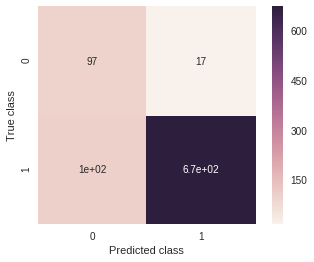

In [11]:
validation_generator_noshuffle.reset()
predictions = my_first_cnn.predict_generator(validation_generator_noshuffle, steps=9)
C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

# Too much of a good thing

The more our classifier looks at the training data, the more it will learn about it. It might even learn too much!

In [12]:
%%time
from keras.optimizers import Adam

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history_pt3 = my_first_cnn.fit_generator(train_generator,
                                         class_weight = {0: 7, 1: 1},
                                         steps_per_epoch=20,
                                         epochs=10,
                                         validation_data=validation_generator,
                                         validation_steps=10,
                                         verbose=1)

my_first_cnn.save('my_first_cnn_3.h5')

Epoch 1/10
20/20 [==============================] - 14s 675ms/step - loss: 0.3905 - acc: 0.8835 - val_loss: 0.2808 - val_acc: 0.8735
Epoch 2/10
20/20 [==============================] - 13s 641ms/step - loss: 0.3529 - acc: 0.9011 - val_loss: 0.2685 - val_acc: 0.8917
Epoch 3/10
20/20 [==============================] - 13s 640ms/step - loss: 0.3438 - acc: 0.9055 - val_loss: 0.2502 - val_acc: 0.8965
Epoch 4/10
20/20 [==============================] - 12s 624ms/step - loss: 0.3261 - acc: 0.9134 - val_loss: 0.4478 - val_acc: 0.8057
Epoch 5/10
20/20 [==============================] - 13s 644ms/step - loss: 0.2952 - acc: 0.9135 - val_loss: 0.4384 - val_acc: 0.8198
Epoch 6/10
20/20 [==============================] - 13s 632ms/step - loss: 0.2765 - acc: 0.9250 - val_loss: 0.3356 - val_acc: 0.8563
Epoch 7/10
20/20 [==============================] - 12s 611ms/step - loss: 0.2493 - acc: 0.9327 - val_loss: 0.3581 - val_acc: 0.8623
Epoch 8/10
20/20 [==============================] - 13s 653ms/step - 

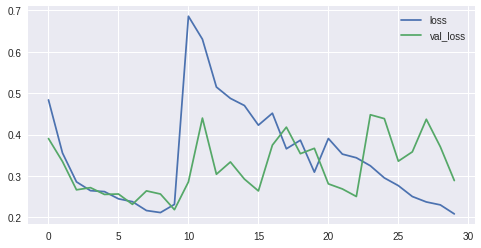

In [13]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1,1)

f.set_size_inches(8,4)

loss = [step for part in [history_pt1, history_pt2, history_pt3] for step in  part.history['loss']]
val_loss = [step for part in [history_pt1, history_pt2, history_pt3] for step in  part.history['val_loss']]


axes.plot(range(len(loss)), loss, label='loss')
axes.plot(range(len(loss)), val_loss, label='val_loss')
axes.legend()

0.5397727272727273 0.8333333333333334


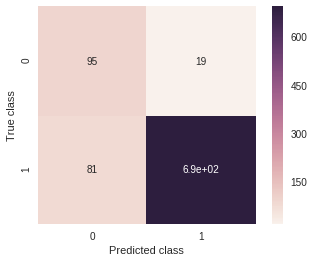

In [14]:
validation_generator_noshuffle.reset()
predictions = my_first_cnn.predict_generator(validation_generator_noshuffle, steps=9)

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

# Making stuff up

Our classifier is learning features that are too specific of the training data, which makes it not generalize too well. 

Since we want to make it recognize more varied images, we could feed it more varied images. But we already have as many as we could gather!

Surprisingly, there is a way to get more from the data we have: making stuff up! In order to look more serious, we will call it [data augmentation].

[data augmentation]: https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced

In [15]:
train_datagen_augmented = ImageDataGenerator(rescale=1 / 255,
                                             rotation_range=40,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,
                                             fill_mode='nearest')

train_generator_aug = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                  target_size=(120,120),
                                                                  batch_size=100,
                                                                  class_mode='binary')


Found 4765 images belonging to 2 classes.


In [0]:
images, classes = train_generator_aug.next()

In [17]:
images.shape

(100, 120, 120, 3)

1.0


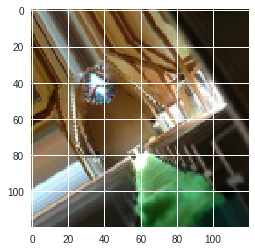

In [18]:
import random

n = random.randint(0, 99)  
plt.imshow(images[n])
print(classes[n])

In [19]:
%%time
train_generator_aug.reset()

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history_pt4 = my_first_cnn.fit_generator(train_generator_aug,
                                         class_weight = {0: 7, 1: 1},
                                         steps_per_epoch=20,
                                         epochs=10,
                                         validation_data=validation_generator,
                                         validation_steps=10,
                                         verbose=1)

my_first_cnn.save('my_first_cnn_4.h5')

Epoch 1/10
20/20 [==============================] - 20s 1s/step - loss: 0.7582 - acc: 0.7895 - val_loss: 0.4504 - val_acc: 0.7682
Epoch 2/10
20/20 [==============================] - 19s 942ms/step - loss: 0.7707 - acc: 0.7910 - val_loss: 0.4670 - val_acc: 0.7702
Epoch 3/10
20/20 [==============================] - 19s 940ms/step - loss: 0.6916 - acc: 0.8183 - val_loss: 0.5601 - val_acc: 0.7156
Epoch 4/10
20/20 [==============================] - 19s 955ms/step - loss: 0.6662 - acc: 0.8040 - val_loss: 0.2577 - val_acc: 0.8927
Epoch 5/10
20/20 [==============================] - 18s 920ms/step - loss: 0.7748 - acc: 0.7704 - val_loss: 0.4034 - val_acc: 0.8168
Epoch 6/10
20/20 [==============================] - 19s 965ms/step - loss: 0.6187 - acc: 0.8455 - val_loss: 0.3797 - val_acc: 0.8047
Epoch 7/10
20/20 [==============================] - 20s 1s/step - loss: 0.6762 - acc: 0.7980 - val_loss: 0.3260 - val_acc: 0.8482
Epoch 8/10
20/20 [==============================] - 21s 1s/step - loss: 0.6

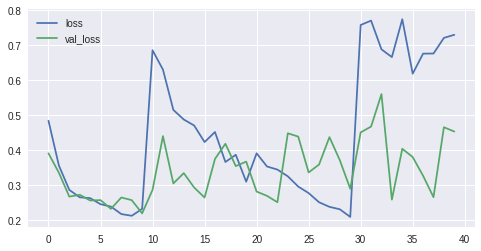

In [20]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1,1)

f.set_size_inches(8,4)

loss = [step for part in [history_pt1, history_pt2, history_pt3, history_pt4] for step in  part.history['loss']]
val_loss = [step for part in [history_pt1, history_pt2, history_pt3, history_pt4] for step in  part.history['val_loss']]


axes.plot(range(len(loss)), loss, label='loss')
axes.plot(range(len(loss)), val_loss, label='val_loss')
axes.legend()

0.3576158940397351 0.9473684210526315


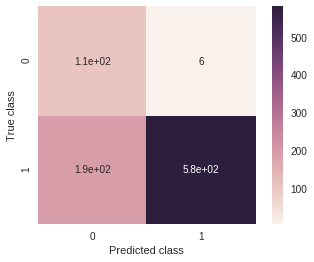

In [21]:
validation_generator_noshuffle.reset()
predictions = my_first_cnn.predict_generator(validation_generator_noshuffle, steps=9)

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

# On the shoulders of giants

Our first, very simple classifier is now about as good as it can get. Since we haven't been able to overfit, we could try to make it more complex, so that it can learn more nuanced features.

We could, definitely, try and compare many different architectures. But why do that if there are world-class experts who have [done it already]?

[done it already]: https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11

In [22]:
from keras.applications import VGG16

vgg = VGG16(weights='imagenet', 
            include_top=False, 
            input_shape=(120,120,3))

model = keras.Sequential()
vgg.trainable = False
model.add(vgg)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 15,329,473
Trainable params: 614,785
Non-trainable params: 14,714,688
__________________________________________________________

In [23]:
model.layers[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 120, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 120, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 120, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 60, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 60, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 60, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 30, 128)       0         
__________

In [24]:
%%time

model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

vgg_history_1 = model.fit_generator(train_generator_aug,
                                  class_weight = {0: 7, 1: 1},
                                  steps_per_epoch=20,
                                  epochs=10,
                                  validation_data=validation_generator,
                                  validation_steps=10)

model.save('vgg_1.h5')

Epoch 1/10
20/20 [==============================] - 27s 1s/step - loss: 0.9863 - acc: 0.6985 - val_loss: 0.3011 - val_acc: 0.8694
Epoch 2/10
20/20 [==============================] - 20s 1s/step - loss: 0.7978 - acc: 0.7687 - val_loss: 0.3964 - val_acc: 0.8350
Epoch 3/10
20/20 [==============================] - 20s 984ms/step - loss: 0.6843 - acc: 0.8295 - val_loss: 0.2508 - val_acc: 0.9059
Epoch 4/10
20/20 [==============================] - 20s 1s/step - loss: 0.6961 - acc: 0.8350 - val_loss: 0.3327 - val_acc: 0.8715
Epoch 5/10
20/20 [==============================] - 21s 1s/step - loss: 0.6626 - acc: 0.8394 - val_loss: 0.2681 - val_acc: 0.8937
Epoch 6/10
20/20 [==============================] - 20s 999ms/step - loss: 0.5987 - acc: 0.8400 - val_loss: 0.2097 - val_acc: 0.9211
Epoch 7/10
20/20 [==============================] - 20s 978ms/step - loss: 0.6307 - acc: 0.8416 - val_loss: 0.2485 - val_acc: 0.9069
Epoch 8/10
20/20 [==============================] - 20s 989ms/step - loss: 0.5469

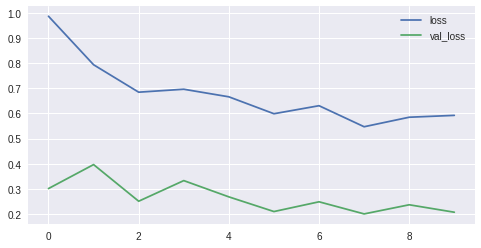

In [25]:
f, axes = plt.subplots(1,1)

f.set_size_inches(8,4)

loss = vgg_history_1.history['loss']
val_loss = vgg_history_1.history['val_loss']


axes.plot(range(len(loss)), loss, label='loss')
axes.plot(range(len(loss)), val_loss, label='val_loss')
axes.legend()

0.6477987421383647 0.9035087719298246


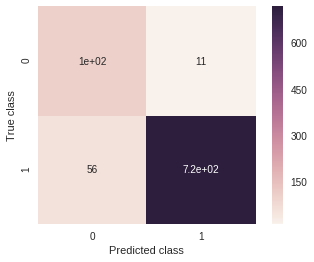

In [26]:
validation_generator_noshuffle.reset()
predictions = model.predict_generator(validation_generator_noshuffle, steps=9)

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

In [27]:
%%time

model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-4),
                     metrics=['acc'])

vgg_history_2 = model.fit_generator(train_generator_aug,
                                  class_weight = {0: 7, 1: 1},
                                  steps_per_epoch=20,
                                  epochs=10,
                                  validation_data=validation_generator,
                                  validation_steps=10)

model.save('vgg_2.h5')

Epoch 1/10
20/20 [==============================] - 23s 1s/step - loss: 0.5107 - acc: 0.8755 - val_loss: 0.2355 - val_acc: 0.9119
Epoch 2/10
20/20 [==============================] - 20s 1s/step - loss: 0.5644 - acc: 0.8593 - val_loss: 0.2326 - val_acc: 0.9170
Epoch 3/10
20/20 [==============================] - 20s 1000ms/step - loss: 0.5080 - acc: 0.8715 - val_loss: 0.2312 - val_acc: 0.9059
Epoch 4/10
20/20 [==============================] - 19s 959ms/step - loss: 0.4632 - acc: 0.8871 - val_loss: 0.2549 - val_acc: 0.9119
Epoch 5/10
20/20 [==============================] - 20s 995ms/step - loss: 0.4947 - acc: 0.8710 - val_loss: 0.2118 - val_acc: 0.9241
Epoch 6/10
20/20 [==============================] - 20s 1s/step - loss: 0.4776 - acc: 0.8670 - val_loss: 0.2262 - val_acc: 0.9089
Epoch 7/10
20/20 [==============================] - 20s 986ms/step - loss: 0.5259 - acc: 0.8713 - val_loss: 0.2327 - val_acc: 0.9140
Epoch 8/10
20/20 [==============================] - 20s 1s/step - loss: 0.523

In [28]:
!date 

Thu Nov 29 15:48:30 UTC 2018


0.6375 0.8947368421052632


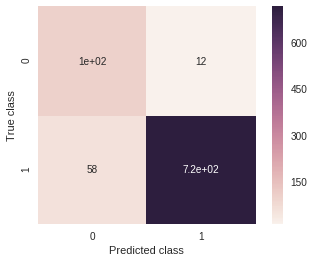

In [29]:
validation_generator_noshuffle.reset()
predictions = model.predict_generator(validation_generator_noshuffle, steps=9)

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

# The road ahead

This talk has been based on a [series of posts] I'm currently publishing in [my blog]. You can check them out if you are curious about how I got the data, you want to learn more about what I talked about today, or you want to learn more techniques that we could apply to our classifier to make it even better.

If you think this is your thing, you can learn a lot more in the [KSchool masters program in Deep Learning and Artificial Intelligence]! 

Or, if you think you have a project that we could do together, I'm available. Just contact me through my [email] or [linkedin]

[series of posts]: http://mateos.io/blog/getting-some-hotdogs/
[my blog]: http://mateos.io/blog/
[KSchool masters program in Deep Learning and Artificial Intelligence]: https://kschool.com/cursos/master-deep-learning-inteligencia-artificial-madrid/
[email]: daniel@mateos.io
[linkedin]: https://es.linkedin.com/in/daniel-mateos-san-mart%C3%ADn-b02aa956